In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [15]:
# Veri Yükleme
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [16]:
# Veri Analizi ve Temizleme

 # Eksik değerleri doldurma
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].fillna(train[column].mode()[0])
    else:
        train[column] = train[column].fillna(train[column].mean())


In [17]:
# Kategorik değişkenlerin one-hot encoding ile işlenmesi
train = pd.get_dummies(train, drop_first=True)

In [18]:
# Hedef ve Özelliklerin Ayrılması
X = train.drop(["Id", "SalePrice"], axis=1)
y = train["SalePrice"]

In [19]:
# Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Eğitim ve Değerlendirme Fonksiyonu
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

In [21]:
# Modeller ve Performansları
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

results = {}

for model_name, model in models.items():
    r2, rmse, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae
    }

In [22]:
# Performans Sonuçlarını Görselleştirme
results_df = pd.DataFrame(results).T
print(results_df)

                         R²          RMSE           MAE
Linear Regression  0.655768  51384.541455  20234.233976
SVM               -0.024645  88653.026128  59556.731222
Decision Tree      0.801049  39064.283156  26705.962329
Random Forest      0.890254  29013.540038  17664.186712
Gradient Boosting  0.895650  28291.250524  17557.128476
XGBoost            0.889331  29135.337918  18150.077028


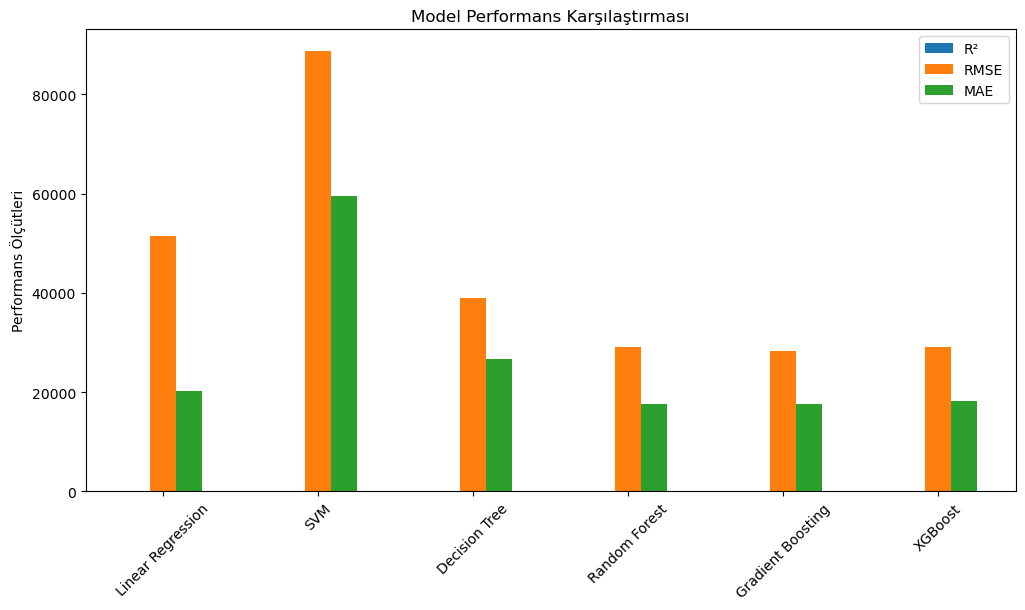

In [25]:
# Performans Grafiği
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performans Karşılaştırması')
plt.ylabel('Performans Ölçütleri')
plt.xticks(rotation=45)
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')  # Resmi kaydetme
plt.show()
